<a href="https://colab.research.google.com/github/ParthPathak27/Time-Series-Analysis-and-Forecasting/blob/main/CNM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IT $509$: Computational Numerical Methods**
## **Research Project on "Time Series Analysis and Forecasting"**
### Authors: Parth Pathak $(202016006)$ & Piyush Sharma $(202016007)$


# **Time Series Analysis**
# 1. Introduction about Time Series

Time series is a sequence of observations recorded at regular time intervals.

Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual. Sometimes, we might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.

**Why Analysis of time series?**

Because it is the preparatory step before we develop a forecast of the series. Besides, time series forecasting has enormous commercial significance because of stuff that is important to a business like demand and sales, number of visitors to a website, stock price etc. are essentially time series data.

**Process of analyzing a time series**

Time series analysis involves understanding various aspects about the inherent nature of the series so that we are better informed to create meaningful and accurate forecasts.

# 2. Importing time series

The data for a time series typically stores in .csv files or other spreadsheet formats and contains two columns: the date and the measured value.

Reading the time series dataset (here, a csv file on Australian Drug Sales) as a pandas dataframe. Adding the parse_dates=['date'] argument will make the date column to be parsed as a date field.

In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Importing as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Piyush9323/datasets/main/drug_sales.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


Alternately, we can import it as a pandas Series with the date as index. We just need to specify the index_col argument in the pd.read_csv() to do this.

In [ ]:
ser = pd.read_csv('https://raw.githubusercontent.com/Piyush9323/datasets/main/drug_sales.csv', parse_dates=['date'], index_col='date')
ser.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In the series, we have placed ‘value’ column higher than date to imply that it is a series.

# 3. Working with Panel Data

Panel data is also a time based dataset.

The difference is that, in addition to time series, it also contains one or more related variables that are measured for the same time periods.

Typically, the columns present in panel data contain explanatory variables that can be helpful in predicting the Y, provided those columns will be available at the future forecasting period.

An example of panel data is shown below (On another dataset Market Arrivals).

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Piyush9323/datasets/main/MarketArrivals.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


# 4. Visualizing a time series

Using matplotlib to visualise the series.

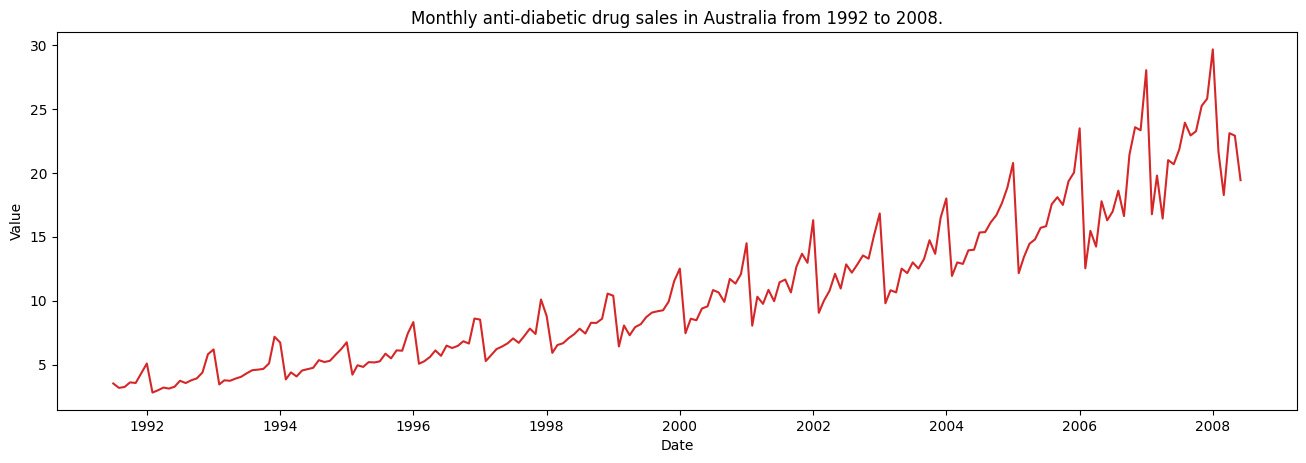

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Piyush9323/datasets/main/drug_sales.csv', parse_dates=['date'], index_col='date')

# Drawing Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.') 

Since all values are positive, we can show this on both sides of the Y axis to emphasize the growth.
Plotting for AirPassenger dataset

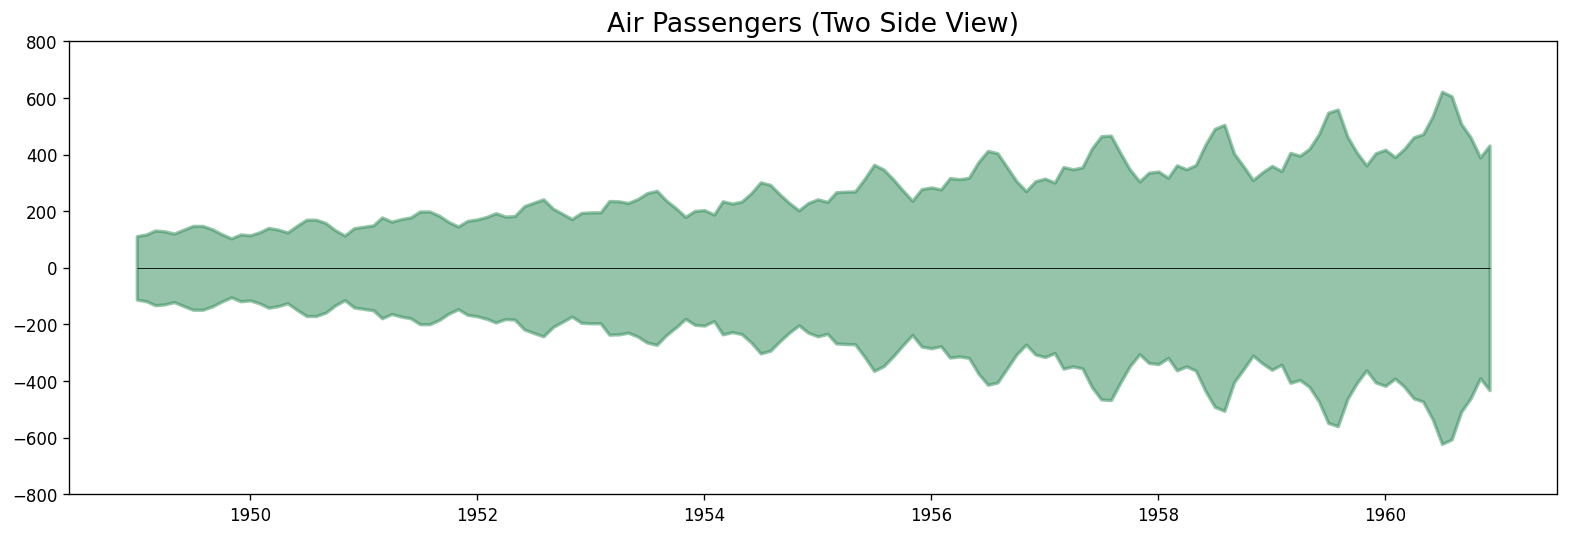

In [ ]:
# Importing another dataset.
df = pd.read_csv('https://raw.githubusercontent.com/Piyush9323/datasets/main/AirPassengers.csv', parse_dates=['date'])
x = df['date'].values
y1 = df['value'].values

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.show()

Since it is a monthly time series and follows a certain repetitive pattern every year, we can plot each year as a separate line in the same plot. This lets us compare the year wise patterns side-by-side.

## Seasonal Plot of a Time Series

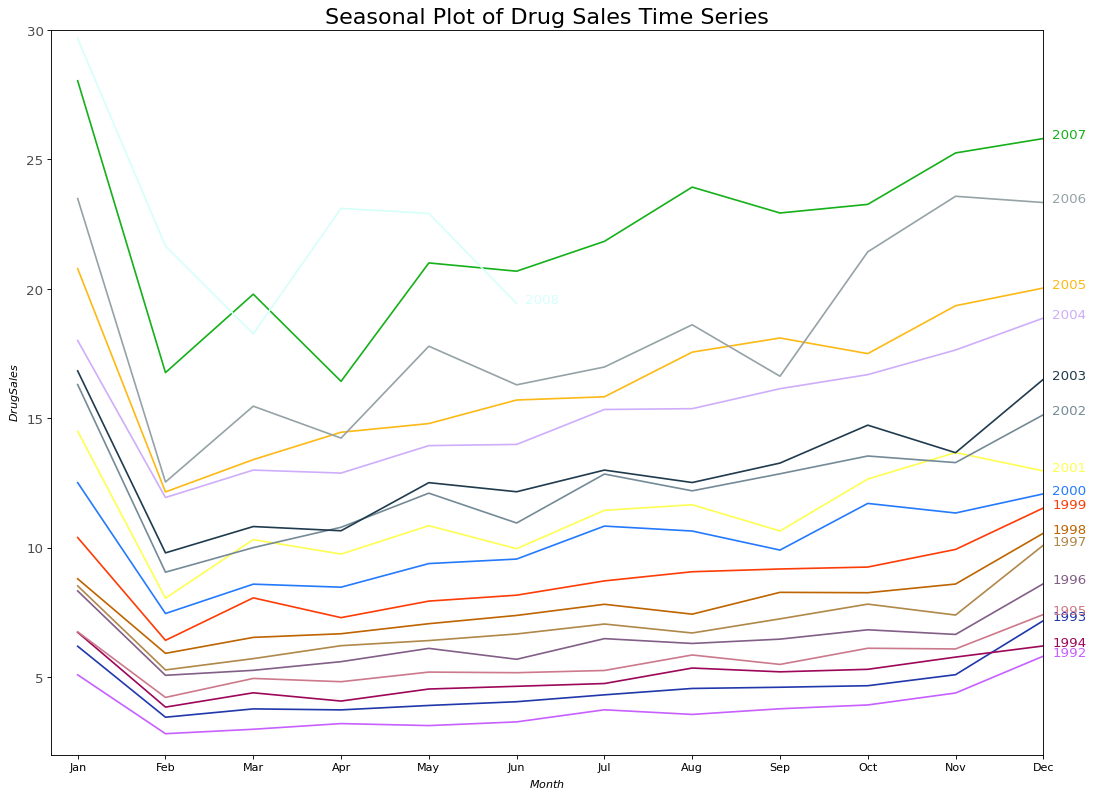

In [ ]:
# Importing Data
df = pd.read_csv('https://raw.githubusercontent.com/Piyush9323/datasets/main/drug_sales.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Preparig data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Preparig Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Plottig
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

**Interpretation :** There is a steep fall in drug sales every February, rising again in March, falling again in April and so on. Clearly, the pattern repeats within a given year, every year.

However, as years progress, the drug sales increase overall. We can nicely visualize this trend and how it varies each year in a nice year-wise boxplot. Likewise, we can do a month-wise boxplot to visualize the monthly distributions.

## Boxplot of Month-wise (Seasonal) and Year-wise (Trend) Distribution

We are grouping the data at seasonal intervals and seeing how the values are distributed within a given year or month and how it compares over time.

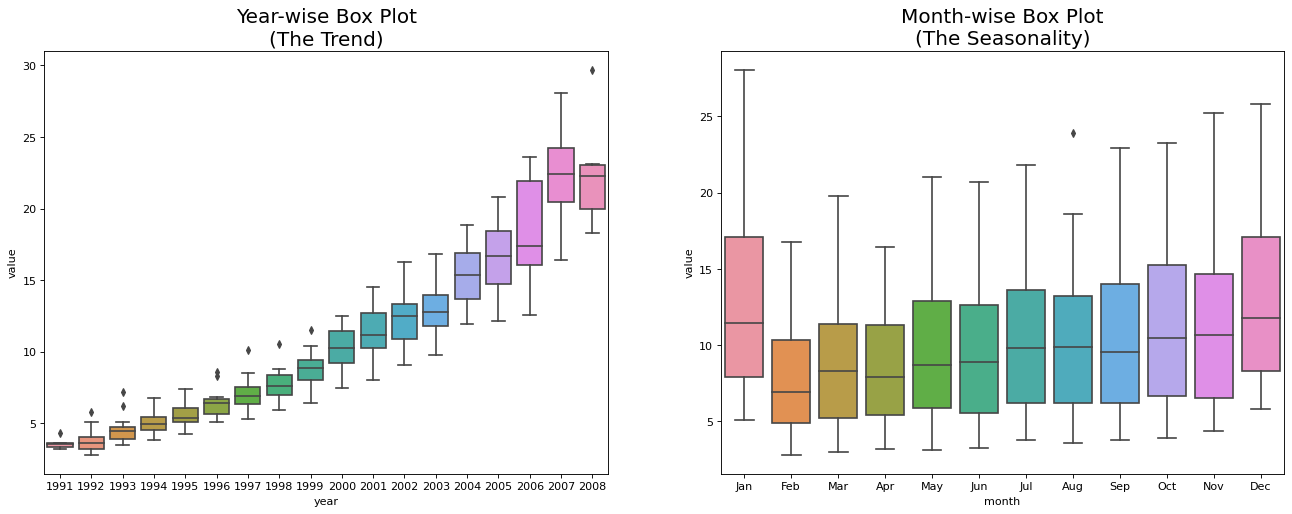

In [ ]:
# Importing Data
df = pd.read_csv('https://raw.githubusercontent.com/Piyush9323/datasets/main/drug_sales.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Preparing data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Drawing Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

The boxplots make the year-wise and month-wise distributions evident. Also, in a month-wise boxplot, the months of December and January clearly has higher drug sales, which can be attributed to the holiday discounts season.

So far, we have seen the similarities to identify the pattern. Now, how to find out any deviations from the usual pattern?

# 5. Patterns in a time series

Any time series may be split into the following components: **Base Level + Trend + Seasonality + Error**

A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.

So, a time series may be imagined as a combination of the trend, seasonality and the error terms.

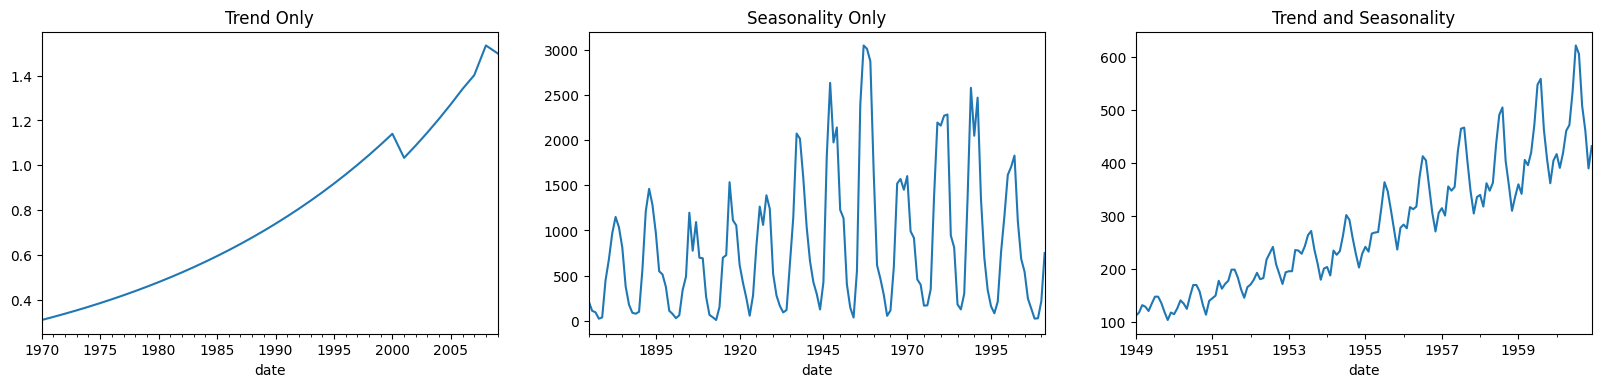

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/Piyush9323/datasets/main/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/Piyush9323/datasets/main/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/Piyush9323/datasets/main/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

Another aspect to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. Care should be taken to not confuse ‘cyclic’ effect with ‘seasonal’ effect.

Difference between ‘cyclic’ vs ‘seasonal’ pattern.

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

# 6. Additive and multiplicative time series

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

Additive time series:

**Value = Base Level + Trend + Seasonality + Error**

Multiplicative Time Series:

**Value = Base Level x Trend x Seasonality x Error**

# 7. Decomposing a time series into its components

We can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

The seasonal_decompose in statsmodels implements this conveniently.

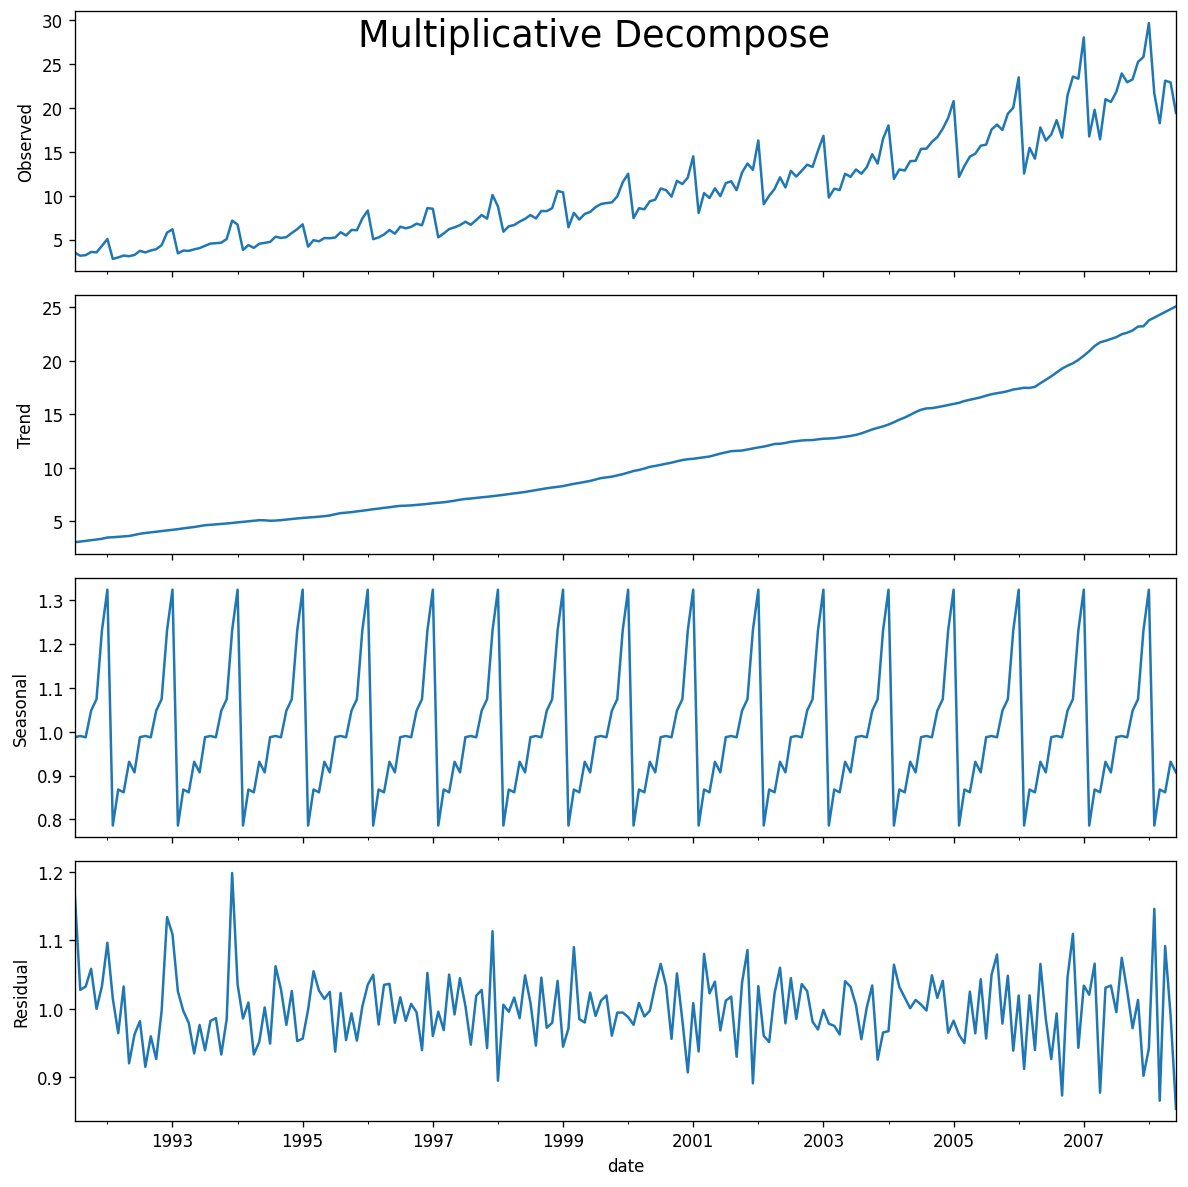

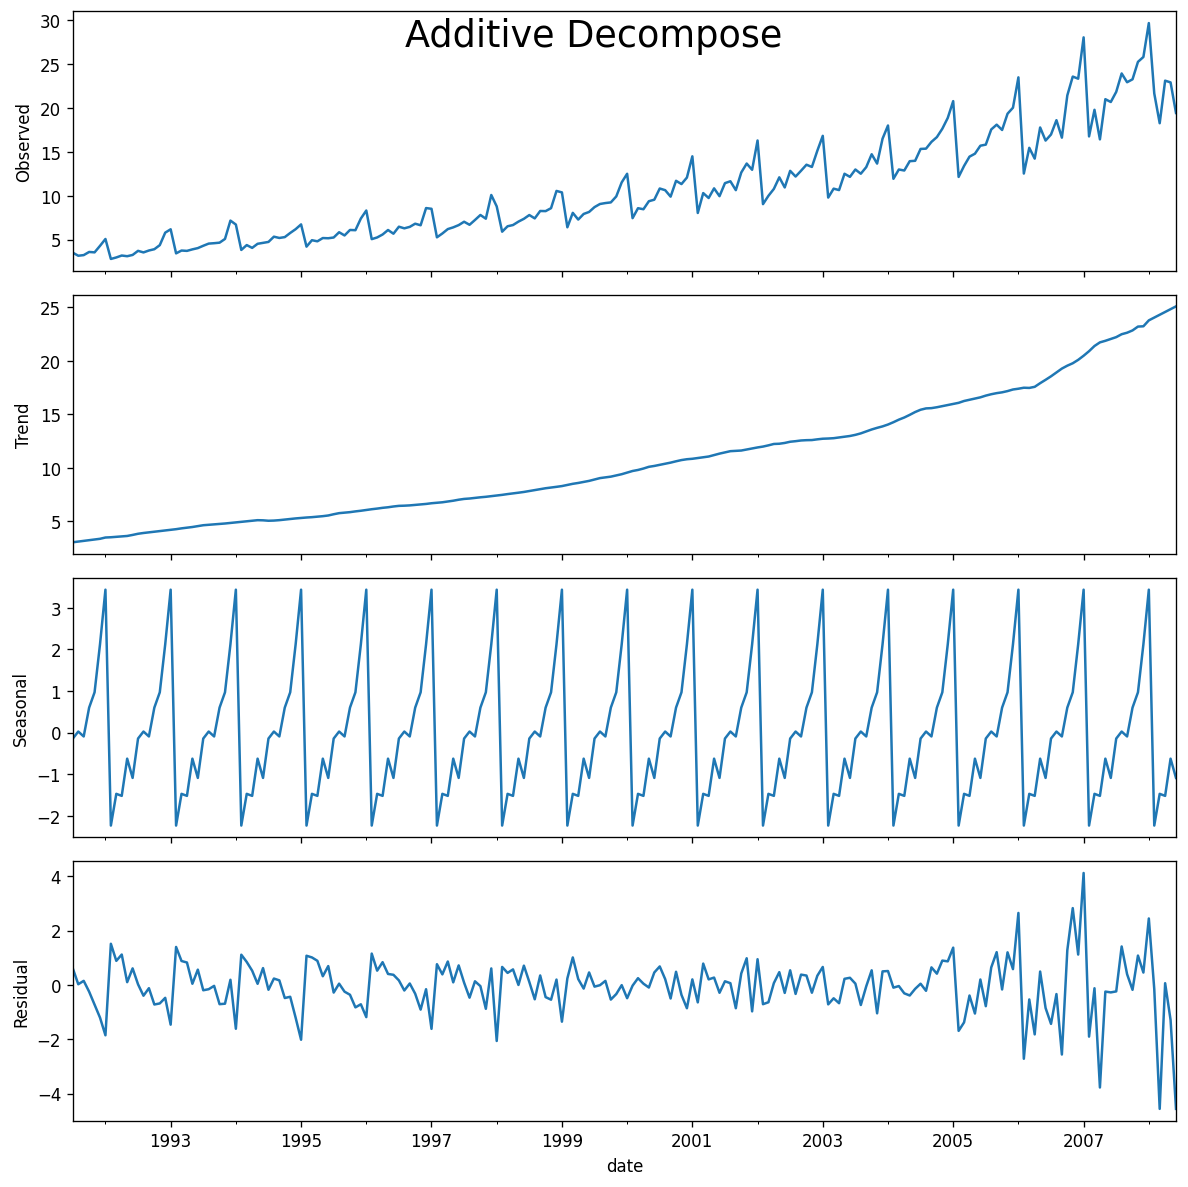

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/Piyush9323/datasets/main/drug_sales.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

Setting extrapolate_trend='freq' takes care of any missing values in the trend and residuals at the beginning of the series.

If you look at the residuals of the additive decomposition closely, it has some pattern left over. The multiplicative decomposition, however, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

The numerical output of the trend, seasonal and residual components are stored in the result_mul output itself. Let’s extract them and put it in a dataframe.

In [ ]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


If you check, the product of seas, trend and resid columns should exactly equal to the actual_values.

# 8. Stationary and Non-Stationary Time Series

Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time.

That is, the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values.

A stationary time series id devoid of seasonal effects as well.

So how to identify if a series is stationary or not? Let’s plot some examples to make it clear:

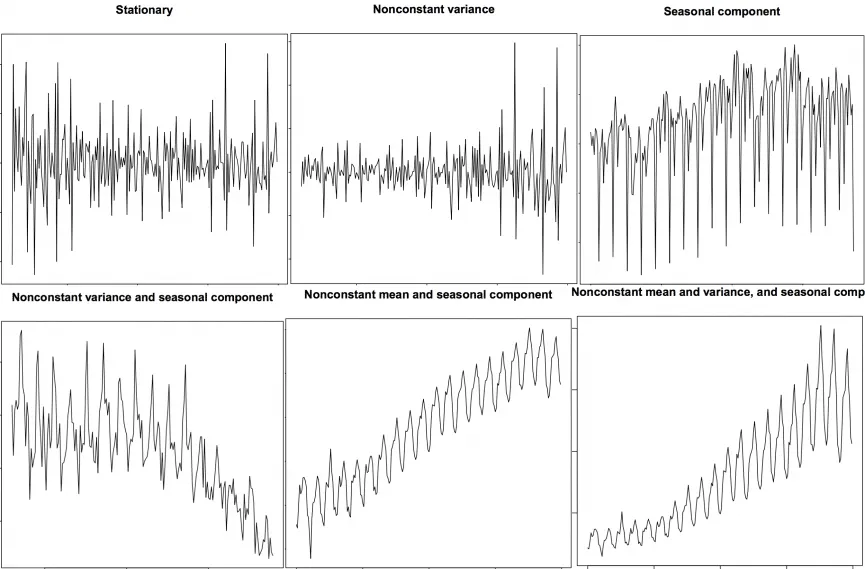

The above image is sourced from R’s TSTutorial.

# 9. Making a time series stationary.

We can make series stationary by:

1. Differencing the Series (once or more)
2. Take the log of the series
3. Take the nth root of the series
4. Combination of the above

The most common and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

Differencing the series.

If $Y_{t}$ is the value at time ‘$t$’, then the first difference of $Y = Y_{t} – Y_{t-1}$. In simpler terms, differencing the series is nothing but subtracting the next value by the current value.

If the first difference doesn’t make a series stationary, we can go for the second differencing. And so on.

For example, consider the following series: $[1, 5, 2, 12, 20]$

First differencing gives: $[5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]$

Second differencing gives: $[-3-4, -10-3, 8-10] = [-7, -13, -2]$

# **Time Series Forecasting**

Time Series forecasting is the process of using a statistical model to predict future values of a time series based on past results.

### Some Use Cases
- To predict the number of incoming or churning customers.
- To explaining seasonal patterns in sales.
- To detect unusual events and estimate the magnitude of their effect.
- To Estimate the effect of a newly launched product on number of sold units.

### Components of a Time Series

- **Trend:** The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).

- **Seasonality:** The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions, or an increase in the number of airline passengers during holidays each year.

- **Cyclical Component:** These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of $3$ to $12$ years depending on the nature of the time series.

- **Irregular Variation:** These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.

- **ETS Decomposition:** ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend, and Seasonality.


            value
date             
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121


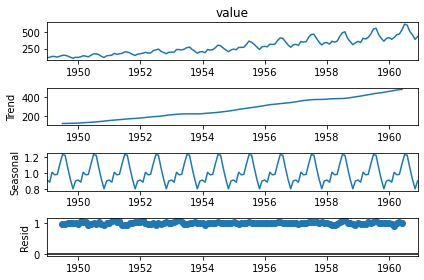

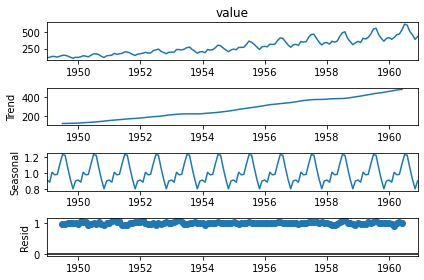

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib as plt
from statsmodels.tsa.seasonal import seasonal_decompose
  
# Read the AirPassengers dataset
airline = pd.read_csv('https://raw.githubusercontent.com/Piyush9323/datasets/main/AirPassengers.csv', index_col ='date', parse_dates = True)
  
# Print the first five rows of the dataset
print(airline.head())
  
# ETS Decomposition
result = seasonal_decompose(airline['value'], model ='multiplicative')
  
# ETS plot 
result.plot()

# 1. What is LSTM?

LSTM stands for Short Term Long Term Memory. It is a model or an architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have “short-term memory” in that they use persistent past information for use in the current neural network. Essentially, the previous information is used in the current task. This means that we do not have a list of all of the previous information available for the neural node.



# 2. Forecast Time Series with LSTM

Importing the libraries

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# fix random seed for reproducibility
numpy.random.seed(7)

Now let’s load the data, and prepare the data so that we can use it on the LSTM model

In [ ]:
# load the dataset
dataframe = pandas.read_csv('https://raw.githubusercontent.com/Piyush9323/datasets/main/AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

Now, I will split the data into training sets and test sets:

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


# 3. Time Series with LSTM

Preparing and fitting the data with a helper function

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

Reshaping the data before applying the LSTM model

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Fitting the model and training the model with data

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0517
Epoch 2/100
94/94 - 0s - loss: 0.0260
Epoch 3/100
94/94 - 0s - loss: 0.0196
Epoch 4/100
94/94 - 0s - loss: 0.0180
Epoch 5/100
94/94 - 0s - loss: 0.0172
Epoch 6/100
94/94 - 0s - loss: 0.0163
Epoch 7/100
94/94 - 0s - loss: 0.0152
Epoch 8/100
94/94 - 0s - loss: 0.0142
Epoch 9/100
94/94 - 0s - loss: 0.0133
Epoch 10/100
94/94 - 0s - loss: 0.0122
Epoch 11/100
94/94 - 0s - loss: 0.0112
Epoch 12/100
94/94 - 0s - loss: 0.0101
Epoch 13/100
94/94 - 0s - loss: 0.0091
Epoch 14/100
94/94 - 0s - loss: 0.0081
Epoch 15/100
94/94 - 0s - loss: 0.0071
Epoch 16/100
94/94 - 0s - loss: 0.0062
Epoch 17/100
94/94 - 0s - loss: 0.0054
Epoch 18/100
94/94 - 0s - loss: 0.0046
Epoch 19/100
94/94 - 0s - loss: 0.0040
Epoch 20/100
94/94 - 0s - loss: 0.0035
Epoch 21/100
94/94 - 0s - loss: 0.0030
Epoch 22/100
94/94 - 0s - loss: 0.0027
Epoch 23/100
94/94 - 0s - loss: 0.0025
Epoch 24/100
94/94 - 0s - loss: 0.0023
Epoch 25/100
94/94 - 0s - loss: 0.0022
Epoch 26/100
94/94 - 0s - loss: 0.

Now, let’s make predictions and visualize the time series trends by using the matplotlib package in python:

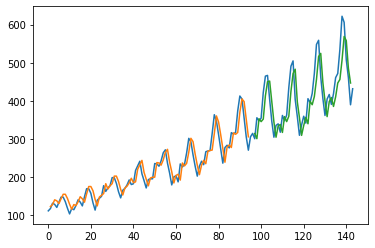

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# 4. ARIMA Model for Time Series Forecasting

**ARIMA Model for Time Series Forecasting**
ARIMA stands for autoregressive integrated moving average model and is specified by three order parameters: $(p, d, q)$.

- **$AR(p)$ Autoregression** – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive ($AR(p)$) component refers to the use of past values in the regression equation for the time series.

- **$I(d)$ Integration** – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.

- **$MA(q)$ Moving Average** – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

**Types of ARIMA Model**

- **ARIMA:** Non-seasonal Autoregressive

- **Integrated Moving Averages
SARIMA:** Seasonal ARIMA

- **SARIMAX:** Seasonal ARIMA with exogenous variables

- **Pyramid Auto-ARIMA**

The **‘auto_arima’** function from the **‘pmdarima’** library helps us to identify the most optimal parameters for an ARIMA model and returns a fitted ARIMA model.

# 5. Parameter Analysis for the ARIMA model

In [ ]:
# To install the library
!pip install pmdarima
  
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['value'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.37 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.41 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.09 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.51 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.28 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.57 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.79 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.44 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.15 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.76 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 21 Apr 2021   AIC                           1019.178
Time:                                     14:41:54   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 6. Fit ARIMA Model to AirPassengers dataset

In [ ]:
# Split data into train / test sets
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['value'],
				order = (0, 1, 1),
				seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.012
Date:                            Wed, 21 Apr 2021   AIC                            896.024
Time:                                    14:41:56   BIC                            909.919
Sample:                                01-01-1949   HQIC                           901.666
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2986      0.075     -3.992      0.000      -0.445      -0.152
ar.S.L12       0.7096      0.229      3.095      0.002       0.260       1.159
ar.S.L24       0.2897      0.100      2.895      0.004       0.094       0.486
ma.S.L12      -0.9824      2.470     -0.398      0.691      -5.824       3.859
sigma2        88.2234    198.961      0.443      0.657    -301.733     478.179
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.86   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 7. Predictions of ARIMA Model against the test set

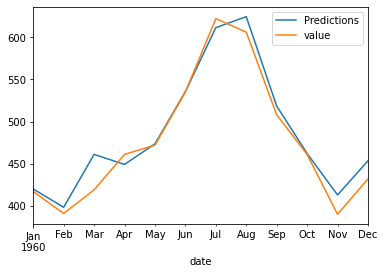

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['value'].plot(legend = True)


# 8. Evaluate the model using MSE and RMSE

In [ ]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["value"], predictions)

# Calculate mean squared error
mean_squared_error(test["value"], predictions)


293.5233122966973

# 9. Forecast using ARIMA Model

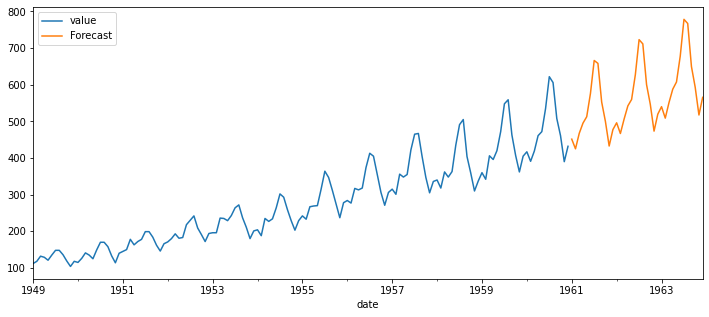

In [ ]:
# Train the model on the full dataset
model = model = SARIMAX(airline['value'], order = (0, 1, 1), seasonal_order = (2, 1, 1, 12))
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start = len(airline), end = (len(airline)-1) + 3 * 12, typ = 'levels').rename('Forecast')

# Plot the forecast values
airline['value'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)